---
authors: Freek Pols
updated: December 3, 2025
---

# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

Beste fit parameters: a = 1.3074, b = 21.4498


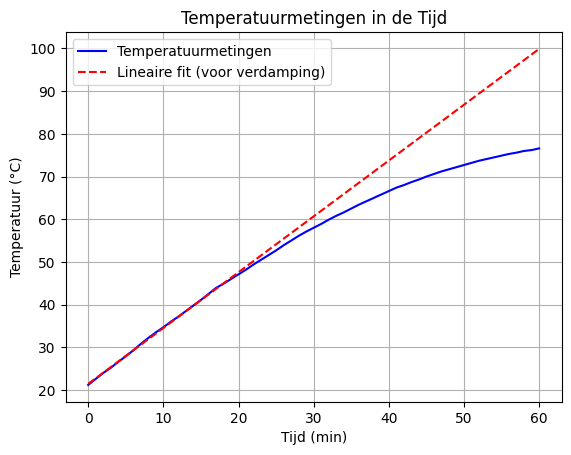

Totaal toegevoerde energie aan het water: 154799.97 J
Het verschil tussen de verwachte totale warmte (zonder verdamping) en de gemeten toegevoegde energie is: 4794.83 J
dit betekent dat 3.10% van de toegevoerde energie niet is gemeten.


In [ ]:
# Importeren van libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Gegeven / constanten
M_MAATBEKER = 820.8
M_MAATBEKER_WATER_START = 1292.9
M_MAATBEKER_WATER_END = 1274.9


# Afgeleide grootheden (massa)
m_water_begin = M_MAATBEKER_WATER_START - M_MAATBEKER
m_water_end = M_MAATBEKER_WATER_END - M_MAATBEKER
m_water_evap = m_water_begin - m_water_end

# Water constanten
C_WATER = 4.18  
R_WATER = 2260


# Data inlezen + fit/plot
data = pd.read_csv('tempmetingen.csv', sep=';')

tijd = data['t (min)'].values
temperatuur = data['t (oC)'].values

temp_voor_verdamping = temperatuur[tijd <= 20]
tijd_voor_verdamping = tijd[tijd <= 20]

def f(t, a, b):
    return a * t + b

popt, pcov = curve_fit(f, tijd_voor_verdamping, temp_voor_verdamping)

print(f"curvefit: a = {popt[0]:.4f}, b = {popt[1]:.4f}")
xtest = np.linspace(0, 60, 100)
ytest = f(xtest, *popt)




# Energie balans / output
E_totaal = m_water_begin * C_WATER * (f(tijd[-1], *popt) - f(tijd[0], *popt))
print(f"totaal toegevoerde energie aan het water: {E_totaal:.2f} J")

E_warmte = m_water_begin * C_WATER * (temperatuur[-1] - temperatuur[0])
E_verdampt = m_water_evap * R_WATER
# Assumpties: geen warmteverlies naar omgeving (ideaal)
# NB: tijdens opwarmen neemt m af door verdamping → kleine bias

print(f"verschil (E_totaal - (E_warmte + E_verdampt)) = {E_totaal - (E_warmte + E_verdampt):.2f} J")
print(f"niet gemeten energie = {(E_totaal - (E_warmte + E_verdampt)) / E_totaal * 100:.2f}%")



plt.figure()
plt.plot(tijd, temperatuur, label='Temperatuurmetingen', color='blue')
plt.plot(xtest, ytest, label='Lineaire fit (voor verdamping)', color='red', linestyle='--')
plt.xlabel('Tijd (min)')
plt.ylabel('Temperatuur (°C)')
plt.title('Temperatuurmetingen in de Tijd')
plt.legend()
plt.grid(True)
plt.show()


Verbeteringen:

1: In plaats van de toegevoegde energie schatten met een curvefit kan het vermogen van het verwarmingselement gebruikt worden. 

2: Er kan bijvoorbeeld een deksel, of een omhulsel om de maatbeker, waardoor er minder warmte energie verloren gaat aan de omgeving. 